<a href="https://colab.research.google.com/github/jikg96/education/blob/main/DAY7_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%9E%85%EB%AC%B82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pima = pd.read_csv('/content/pima-indians-diabetes.csv', header=None)
pima.head() #상위 5개 데이터

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# 컬럼이름 변경
pima.columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass',' pedi', 'age', 'class']
pima.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# 데이터 검사
pima.shape #(768, 9)

(768, 9)

In [ ]:
pima.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
 pedi    float64
age        int64
class      int64
dtype: object

In [ ]:
pima.describe() #기술통계

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
pima.isna().sum() #결측치는 없음

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
 pedi    0
age      0
class    0
dtype: int64

In [ ]:
pima.groupby('class').size() #당뇨병인 사람과 아닌 사람의 명수

class
0    500
1    268
dtype: int64

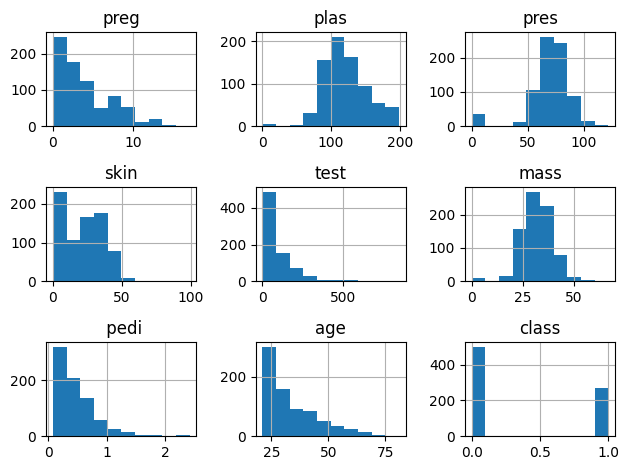

In [ ]:
# PRELIMINARY ANALYSIS
# UNIVARIATE ANALYSIS
pima.hist()
plt.tight_layout()
plt.show() #preg, test, pedi, age가 clas와 연결될 가능성이 있음

<Axes: >

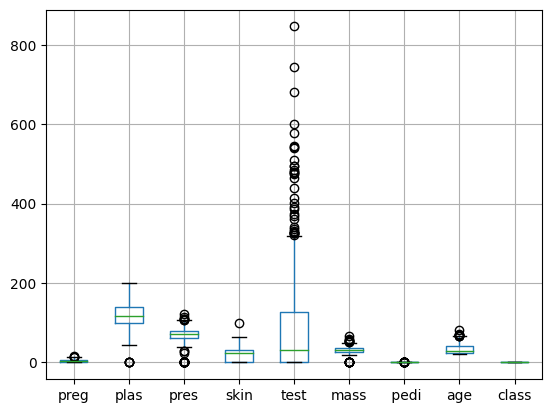

In [ ]:
pima.boxplot() #scaling (min max scaler)

<Axes: xlabel='class', ylabel='count'>

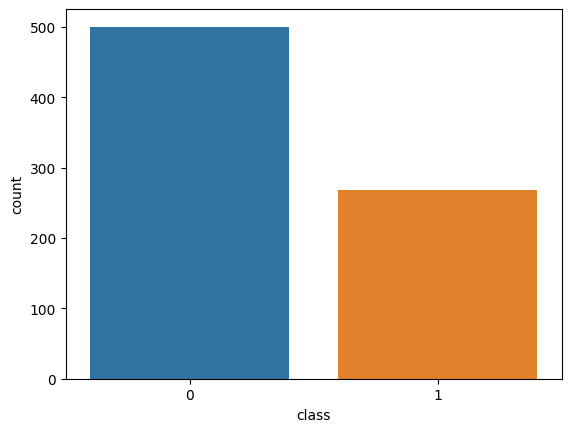

In [ ]:
sns.countplot(x= pima['class']) #imbalanced data ==> resam

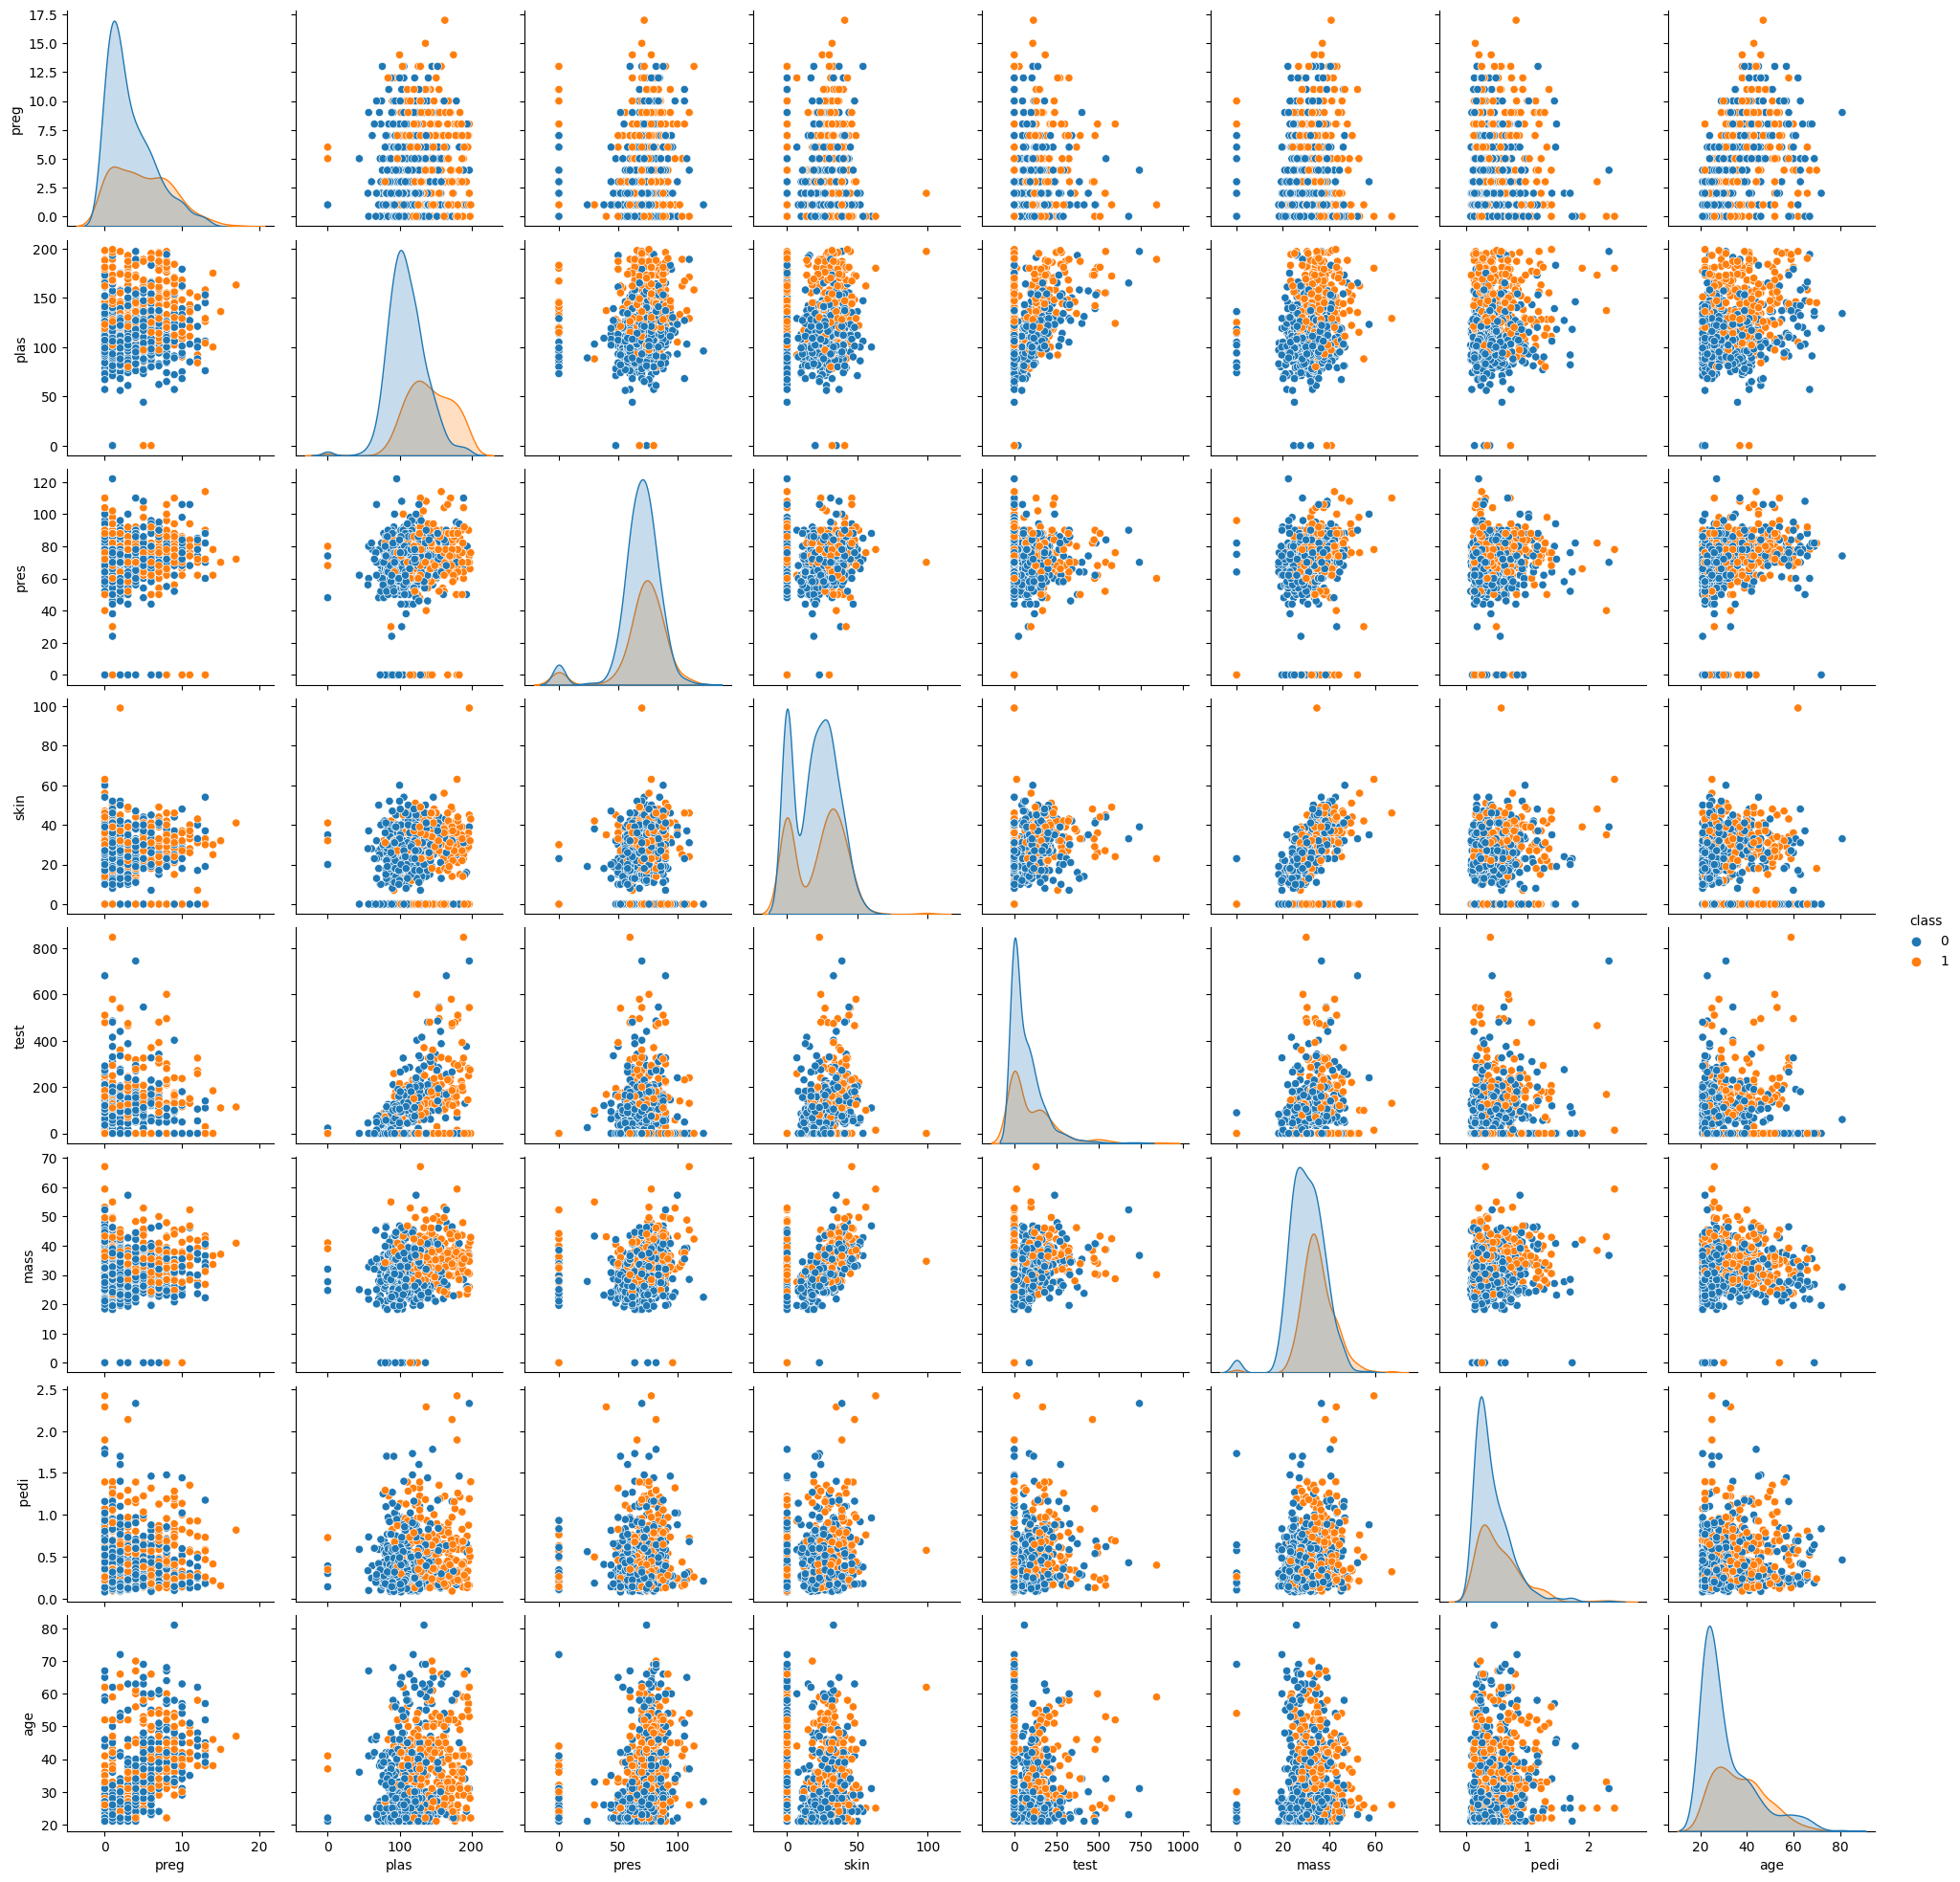

In [ ]:
# MULTIVARIATE ANALYSIS
sns.pairplot(pima, hue='class')

<Axes: >

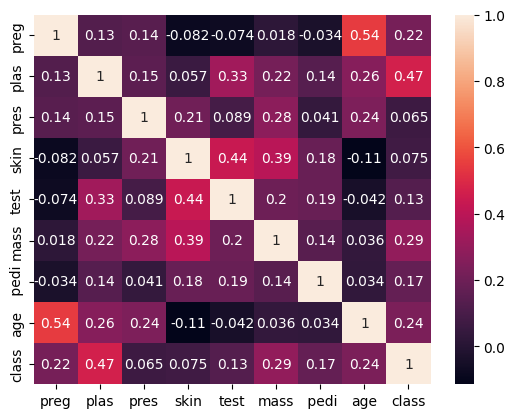

In [ ]:
sns.heatmap(pima.corr(), annot=True)

In [ ]:
# x and y split
y = pima['class']
x = pima.drop('class', axis=1)

<Axes: >

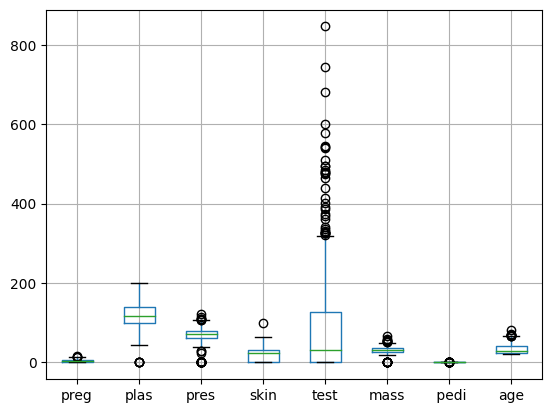

In [ ]:
# x scaling
x.boxplot() #스케일링 전에
plt.show()

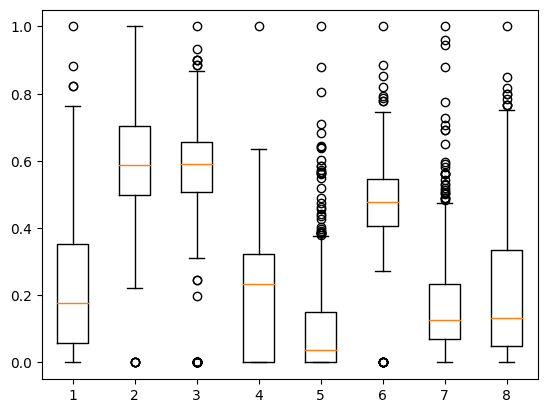

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
plt.boxplot(x_scaled)
plt.show()

<Axes: xlabel='class', ylabel='count'>

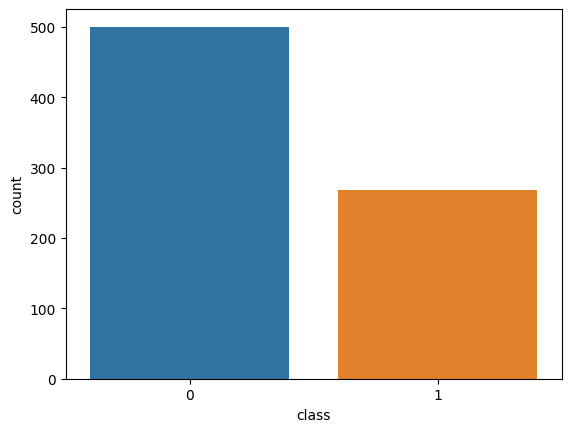

In [ ]:
# resampling
sns.countplot(x=pima['class']) #resmapling전에 데이터 확인

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x_rus, y_rus = rus.fit_resample(x_scaled, y)
type(x_rus), type(y_rus), type(x_scaled), type(y)
x_rus.shape, y_rus.shape, x_scaled.shape, y.shape

((536, 8), (536,), (768, 8), (768,))

<Axes: xlabel='class', ylabel='count'>

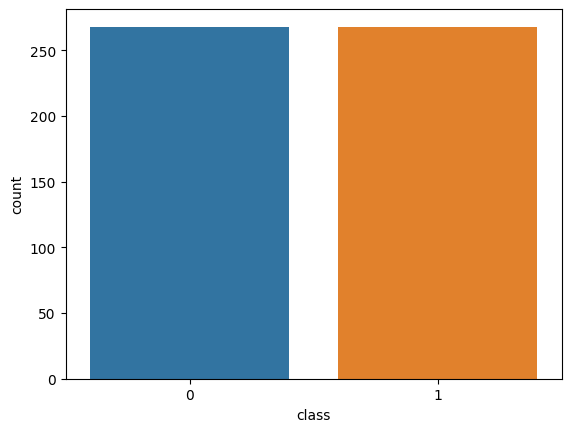

In [ ]:
sns.countplot(x=y_rus)

In [ ]:
# train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=.2, random_state=1)

In [ ]:
x_train.shape

(428, 8)

In [ ]:
# 신경망 모델 구축
# 12 Dense with RELU, 8 Dense nodes with RELU
# initializers
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, activation='relu', input_dim=x_train.shape[1], kernel_initializer='uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='uniform'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                108       
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 옵티마이저와 손실함수, 측정치를 설정해서 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test))#, batch_size=16, epochs=2)

1875/1875 [==============================] - 220s 117ms/step - loss: 0.0032 - accuracy: 0.9979 - val_loss: 0.0214 - val_accuracy: 0.9842


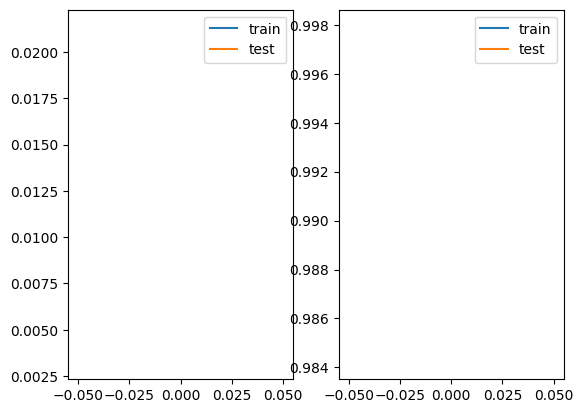

In [ ]:
plt.subplot(121)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.subplot(122)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
# 로스 스코어와 정확도 점수 확인
model.evaluate(x_test, y_test)

313/313 [==============================] - 8s 24ms/step - loss: 0.0201 - accuracy: 0.9826


[0.020136171951889992, 0.9825999736785889]

In [ ]:
# 정확도 계산
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test).round()
accuracy_score(y_test, y_pred)

313/313 [==============================] - 8s 27ms/step


0.9825

In [ ]:
# 혼동행렬
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

ValueError: ignored

In [ ]:
# 분류보고서
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# ROC Curve

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       1.00      0.96      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.97      0.99      0.98      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000
 samples avg       0.98      0.98      0.98     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.show()

ValueError: ignored

# MNIST CNN 예제

In [ ]:
# 데이터 가져오기
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

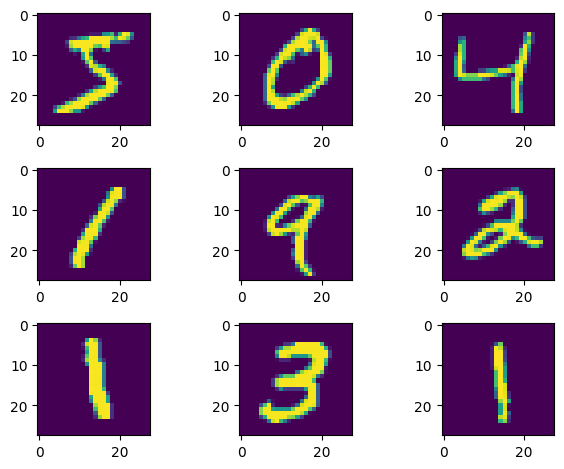

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

In [ ]:
# 데이터 검사
# x_train.reshape(60000,-1).shape # 데이터 모양 바꾸는 방법
# 훈련데이터 검사
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
plt.tight_layout()
plt.show()
y_train[:9]

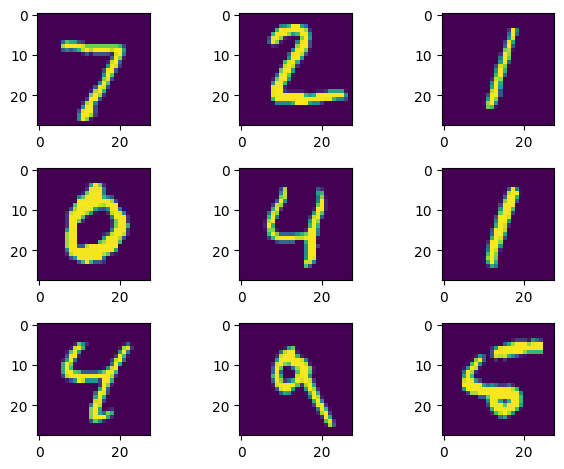

array([7, 2, 1, 0, 4, 1, 4, 9, 5], dtype=uint8)

In [ ]:
# 테스트 데이터 검사
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i])
plt.tight_layout()
plt.show()
y_test[:9]

In [ ]:
# 데이터 전처리
# 3D --> 4D
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [ ]:
# CNN 모델
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense_6 (Dense)             (None, 10)                184330    
                                                                 
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categoical_crossentropy', metrics=['accuracy'])

In [ ]:
# checkpoint
from keras.callbacks import ModelCheckpoint

ckpt_model="weights.best.hdf5"
checkpoint = ModelCheckpoint(ckpt_model, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
history = model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test),callbacks=[checkpoint])

In [ ]:
# 히스토리 그래프
plt.subplot(121)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.subplot(122)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.tight_layout()

In [ ]:
# 로스값, 정확도 계산
model.evaluate(x_test, y_test)

In [ ]:
# 정확도 계산
y_pred = np.argmax(model.predict(x_test), axis=1)
y_test1 = np.argmax(y_test, axis=1)
accuracy_score(y_test1, y_pred)

In [ ]:
np.argmax([1,4,8,3])

In [ ]:
print(classification_report(y_test1, y_pred))